In [1]:
%pylab nbagg
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
numFrames = 10000 # must be even

# Creates two ground truth localizations, one at (0,0) and another at (200,200)
locs = pd.DataFrame(np.vstack((np.zeros((numFrames,2)), 200 * np.ones((numFrames,2)))),
                        index = np.arange(0, 2 * numFrames),
                        columns = ['x [nm]', 'y [nm]'])
locs = pd.concat([locs, pd.DataFrame(np.hstack((np.arange(0, numFrames), np.arange(0,numFrames))),
                                    index = np.arange(0,2 *numFrames),
                                    columns = ['frame'])], axis = 1)
locs = pd.concat([locs, pd.DataFrame(columns = ['z [nm]',
                                               'uncertainty [nm]',
                                               'intensity [photon]',
                                               'offset [photon]',
                                               'loglikelihood',
                                               'sigma [nm]'],
                                     index = np.arange(0,numFrames))], axis = 1)
locs['z [nm]']             = np.zeros(2*numFrames)
locs['uncertainty [nm]']   = 10 * np.ones(2*numFrames) + np.random.randn(2*numFrames)
locs['intensity [photon]'] = 1000 * np.ones(2*numFrames) + 100 * np.random.randn(2*numFrames)
locs['offset [photon]']    = 100 * np.ones(2*numFrames) + 10 * np.random.randn(2*numFrames)
locs['loglikelihood']      = 180 * np.ones(2*numFrames) + 30 * np.random.randn(2*numFrames)
locs['sigma [nm]']         = 140 * np.ones(2*numFrames) + 20 * np.random.randn(2*numFrames)
locs.sort_values('frame', inplace = True)
locs.index = np.arange(0, locs.shape[0])

In [3]:
locs.head()

,x [nm],y [nm],frame,z [nm],uncertainty [nm],intensity [photon],offset [photon],loglikelihood,sigma [nm]
0,0.0,0.0,0,0.0,10.971922,1052.840457,109.318742,216.502461,136.401277
1,200.0,200.0,0,0.0,10.978267,1168.512322,91.258253,171.889767,154.022054
2,200.0,200.0,1,0.0,9.064088,1033.633579,105.603184,148.718209,180.342091
3,0.0,0.0,1,0.0,9.301050,916.685143,113.144814,195.024329,145.847410
4,0.0,0.0,2,0.0,11.008742,992.791361,81.556223,151.906646,147.661676


In [4]:
locs.describe()

,x [nm],y [nm],frame,z [nm],uncertainty [nm],intensity [photon],offset [photon],loglikelihood,sigma [nm]
count,20000.0000,20000.0000,20000.000000,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,100.0000,100.0000,4999.500000,0.0,10.008407,999.489680,99.970417,180.155406,139.887428
std,100.0025,100.0025,2886.823503,0.0,1.001529,100.174183,9.995304,29.986607,20.022395
min,0.0000,0.0000,0.000000,0.0,5.854368,600.233502,55.167737,44.681219,59.516892
25%,0.0000,0.0000,2499.750000,0.0,9.338048,931.181099,93.226127,160.231126,126.518799
50%,100.0000,100.0000,4999.500000,0.0,10.006401,998.999788,99.865266,180.238587,140.042427
75%,200.0000,200.0000,7499.250000,0.0,10.678020,1066.688514,106.746736,200.543604,153.111602
max,200.0000,200.0000,9999.000000,0.0,14.349163,1373.479905,138.635389,297.525426,211.229656


In [5]:
stepSizeX, stepSizeY = 0.01, 0.005 # nm

# Starts shouldn't cause fiducials to overlap with each other or the
# ground truth localizations
startX1, startY1 = 750, 750
fidX1 = np.linspace(0, stepSizeX * numFrames, numFrames) + 5*np.random.randn(numFrames) + startX1
fidY1 = np.linspace(0, stepSizeY * numFrames, numFrames) + 5*np.random.randn(numFrames) + startY1

startX2, startY2 = 1500, 1500
fidX2 = np.linspace(0, stepSizeX * 0.8 * numFrames, numFrames) + 5*np.random.randn(numFrames) + startX2
fidY2 = np.linspace(0, stepSizeY * numFrames, numFrames) + 5*np.random.randn(numFrames) + startY2

<IPython.core.display.Javascript object>


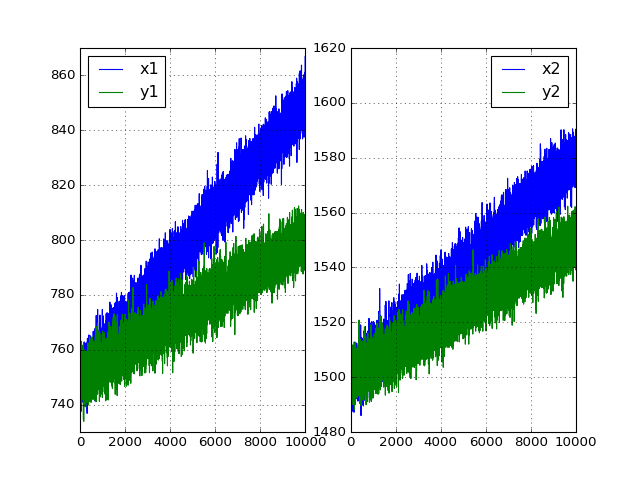

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
ax1.plot(fidX1, label = 'x1')
ax1.plot(fidY1, label = 'y1')
ax1.legend(loc = 'best')
ax1.grid(True)
ax1.set_ylim((startX1 - 20, startX1 + 120))

ax2.plot(fidX2, label = 'x2')
ax2.plot(fidY2, label = 'y2')
ax2.legend(loc = 'best')
ax2.grid(True)
ax2.set_ylim((startX2 - 20, startX2 + 120))
plt.show()

In [8]:
# Put two beads with these trajectories into the dataframe
fids = pd.DataFrame(np.vstack((np.vstack((fidX1, fidY1)).T, np.vstack((fidX2, fidY2)).T)),
                    index = np.arange(0, 2 * numFrames),
                    columns = ['x [nm]', 'y [nm]'])
fids = pd.concat([fids, pd.DataFrame(np.hstack((np.arange(0, numFrames), np.arange(0,numFrames))),
                                    index = np.arange(0,2 *numFrames),
                                    columns = ['frame'])], axis = 1)
fids = pd.concat([fids, pd.DataFrame(columns = ['z [nm]',
                                               'uncertainty [nm]',
                                               'intensity [photon]',
                                               'offset [photon]',
                                               'loglikelihood',
                                               'sigma [nm]'],
                                     index = np.arange(0,numFrames))], axis = 1)
fids['z [nm]']             = np.zeros(2*numFrames)
fids['uncertainty [nm]']   = 10 * np.ones(2*numFrames)   + np.random.randn(2*numFrames)
fids['intensity [photon]'] = 1000 * np.ones(2*numFrames) + 100 * np.random.randn(2*numFrames)
fids['offset [photon]']    = 100 * np.ones(2*numFrames)  + 10 * np.random.randn(2*numFrames)
fids['loglikelihood']      = 180 * np.ones(2*numFrames)  + 30 * np.random.randn(2*numFrames)
fids['sigma [nm]']         = 140 * np.ones(2*numFrames)  + 20 * np.random.randn(2*numFrames)
fids.sort_values('frame', inplace = True)
fids.index = np.arange(0, locs.shape[0])
fids.describe()

,x [nm],y [nm],frame,z [nm],uncertainty [nm],intensity [photon],offset [photon],loglikelihood,sigma [nm]
count,20000.000000,20000.000000,20000.000000,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,1170.006854,1149.954010,4999.500000,0.0,9.995460,999.531306,99.857313,180.204750,139.883207
std,370.979661,375.324222,2886.823503,0.0,0.994703,100.312028,9.963864,30.123921,20.156803
min,736.791388,733.901152,0.000000,0.0,6.171314,611.877338,58.688142,65.093602,62.823375
25%,800.016001,774.929333,2499.750000,0.0,9.322146,931.355192,93.094244,159.581265,126.284202
50%,1176.515176,1150.317281,4999.500000,0.0,9.991284,999.089480,99.881558,180.390340,140.088207
75%,1539.545063,1525.067102,7499.250000,0.0,10.669925,1067.120683,106.489477,200.635501,153.312473
max,1590.525406,1562.316093,9999.000000,0.0,13.797033,1410.296374,137.083852,292.173310,226.003164


In [9]:
np.vstack((np.vstack((fidX1, fidY1)).T, np.vstack((fidX2, fidY2)).T)).shape

(20000, 2)

In [10]:
# Combine fiducial and localization DataFrame
finalLocs = pd.concat((locs, fids), ignore_index=True)

In [11]:
finalLocs.head()

,x [nm],y [nm],frame,z [nm],uncertainty [nm],intensity [photon],offset [photon],loglikelihood,sigma [nm]
0,0.0,0.0,0,0.0,10.971922,1052.840457,109.318742,216.502461,136.401277
1,200.0,200.0,0,0.0,10.978267,1168.512322,91.258253,171.889767,154.022054
2,200.0,200.0,1,0.0,9.064088,1033.633579,105.603184,148.718209,180.342091
3,0.0,0.0,1,0.0,9.301050,916.685143,113.144814,195.024329,145.847410
4,0.0,0.0,2,0.0,11.008742,992.791361,81.556223,151.906646,147.661676


In [12]:
finalLocs.shape

(40000, 9)

In [13]:
finalLocs.to_csv('test_localizations_with_fiducials.csv', index = False)